In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single, beam_inference_single
from util import create_graph_no_sol

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [4]:
train_dl, valid_dl, _ = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

Parsing Graphs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 102.30it/s]


In [5]:
model = Model(4, 32, 2, 0.0)
stats_df = train(
    model,
    graphs_path,
    epochs=12,
    batch_size=32,
    learning_rate=3e-4,
    max_instances=3000,
    max_inference_graphs=100
)

Parsing Graphs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:28<00:00, 106.98it/s]


Valid 0 - loss:1.8937, acc:0.2951, eval_avg_cost:13.1622


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:09<00:00, 178.11it/s]


1.2775652408599854
Train 1 - loss:1.2776, acc:0.5566
Valid 1 - loss:1.1622, acc:0.5975, eval_avg_cost:7.9045


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 218.78it/s]


1.0772980451583862
Train 2 - loss:1.0773, acc:0.6275
Valid 2 - loss:1.0352, acc:0.6476, eval_avg_cost:7.5630


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 214.52it/s]


1.0086156129837036
Train 3 - loss:1.0086, acc:0.6528
Valid 3 - loss:0.9904, acc:0.6557, eval_avg_cost:7.5010


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:08<00:00, 201.76it/s]


0.977177083492279
Train 4 - loss:0.9772, acc:0.6644
Valid 4 - loss:0.9619, acc:0.6654, eval_avg_cost:7.4466


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 232.07it/s]


0.9549722671508789
Train 5 - loss:0.9550, acc:0.6703
Valid 5 - loss:0.9474, acc:0.6691, eval_avg_cost:7.5775


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 236.41it/s]


0.9372795224189758
Train 6 - loss:0.9373, acc:0.6770
Valid 6 - loss:0.9306, acc:0.6734, eval_avg_cost:7.4832


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 220.25it/s]


0.9240511059761047
Train 7 - loss:0.9241, acc:0.6806
Valid 7 - loss:0.9152, acc:0.6800, eval_avg_cost:7.4546


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:08<00:00, 209.33it/s]


0.9136597514152527
Train 8 - loss:0.9137, acc:0.6835
Valid 8 - loss:0.9042, acc:0.6826, eval_avg_cost:7.4292


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:09<00:00, 188.20it/s]


0.9050817489624023
Train 9 - loss:0.9051, acc:0.6863
Valid 9 - loss:0.8985, acc:0.6829, eval_avg_cost:7.4340


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 234.41it/s]


0.8978080153465271
Train 10 - loss:0.8978, acc:0.6891
Valid 10 - loss:0.8933, acc:0.6848, eval_avg_cost:7.3848


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 236.42it/s]


0.8921335339546204
Train 11 - loss:0.8921, acc:0.6911
Valid 11 - loss:0.8895, acc:0.6876, eval_avg_cost:7.3754


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:07<00:00, 235.08it/s]


0.8869757056236267
Train 12 - loss:0.8870, acc:0.6941
Valid 12 - loss:0.8862, acc:0.6886, eval_avg_cost:7.3790


In [6]:
pd.to_pickle(model, "./models/vrp20_best.pkl")

In [7]:
stats_df = stats_df.set_index(["metric", "epoch"]).unstack("metric")["value"]

<AxesSubplot:xlabel='epoch'>

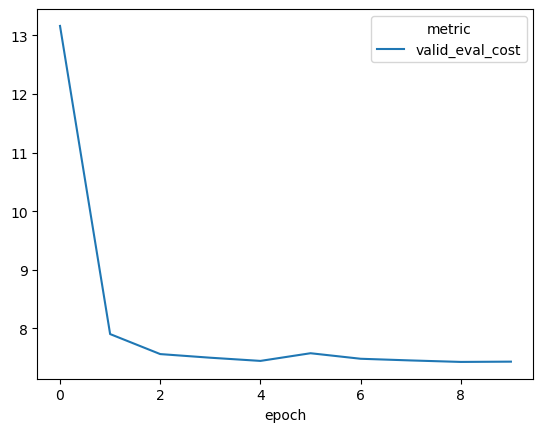

In [8]:
stats_df[["valid_eval_cost"]].iloc[:10].plot()

[]

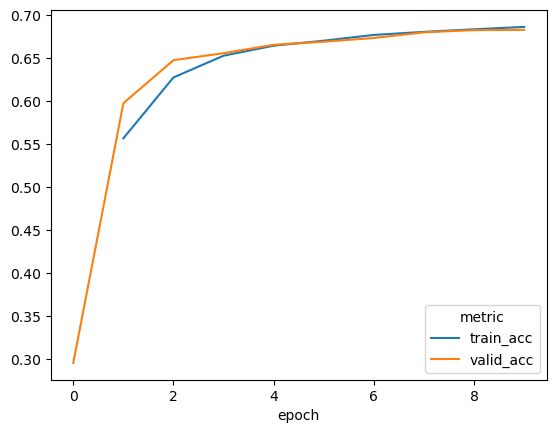

In [9]:
stats_df[["train_acc", "valid_acc"]].iloc[:10].plot().plot()

[]

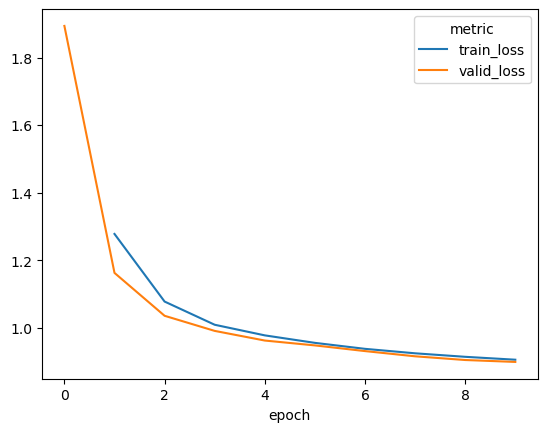

In [10]:
stats_df[["train_loss", "valid_loss"]].iloc[:10].plot().plot()

In [12]:
graphs = pd.read_pickle(graphs_path)

In [13]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [22]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[-1000:]):
    # g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    # g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g, beam_width=10)
    # import pdb; pdb.set_trace()
    # res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:09<00:00,  4.83s/it]


In [23]:
example_g = solved_graphs[1]

saved


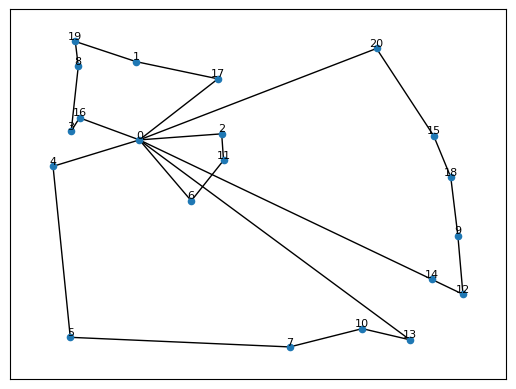

In [26]:
example_g = solved_graphs[0].get_all_graphs()[-1]
example_g.draw_graph(labels=True)

In [27]:
import numpy as np

In [28]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

6.989335192608062

In [5]:
stats_dfs = []

In [6]:
# model = Model(4, 16, 2, 0.0)
stats_dfs = []
batch_sizes = [32, 64, 128]
for bs in batch_sizes:
    model = Model(4, 16, 2, 0.0)
    stats_df = train(model, graphs_path, epochs=8, batch_size=bs, learning_rate=3e-3, max_instances=2000, max_inference_graphs=5)
    stats_dfs.append(stats_df)

Parsing Graphs: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:18<00:00, 108.75it/s]


Valid 0 - loss:1.8970, acc:0.2867, eval_avg_cost:11.8469


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 271.13it/s]


1.280937910079956
Train 1 - loss:1.2809, acc:0.5518
Valid 1 - loss:1.0430, acc:0.6565, eval_avg_cost:6.9651


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 279.66it/s]


0.9768005013465881
Train 2 - loss:0.9768, acc:0.6676
Valid 2 - loss:0.9594, acc:0.6765, eval_avg_cost:7.2637


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 274.59it/s]


0.9337201118469238
Train 3 - loss:0.9337, acc:0.6808
Valid 3 - loss:0.9379, acc:0.6863, eval_avg_cost:7.0824


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 266.18it/s]


0.9190441966056824
Train 4 - loss:0.9190, acc:0.6865
Valid 4 - loss:0.9217, acc:0.6884, eval_avg_cost:7.1967


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 266.27it/s]


0.9115014672279358
Train 5 - loss:0.9115, acc:0.6899
Valid 5 - loss:0.9109, acc:0.6943, eval_avg_cost:6.7871


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 274.61it/s]


0.9062368869781494
Train 6 - loss:0.9062, acc:0.6912
Valid 6 - loss:0.9107, acc:0.6954, eval_avg_cost:7.0051


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 280.36it/s]


0.901757001876831
Train 7 - loss:0.9018, acc:0.6934
Valid 7 - loss:0.9071, acc:0.6923, eval_avg_cost:6.9050


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 265.27it/s]


0.8975414633750916
Train 8 - loss:0.8975, acc:0.6937
Valid 8 - loss:0.9047, acc:0.6975, eval_avg_cost:6.9403
Valid 0 - loss:1.8913, acc:0.2831, eval_avg_cost:11.5146


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 181.48it/s]


1.365513801574707
Train 1 - loss:1.3655, acc:0.5185
Valid 1 - loss:1.0895, acc:0.6295, eval_avg_cost:7.2363


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 189.70it/s]


1.032727599143982
Train 2 - loss:1.0327, acc:0.6461
Valid 2 - loss:1.0031, acc:0.6627, eval_avg_cost:6.9116


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 187.59it/s]


0.9587798118591309
Train 3 - loss:0.9588, acc:0.6700
Valid 3 - loss:0.9810, acc:0.6719, eval_avg_cost:6.9681


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:02<00:00, 195.17it/s]


0.9343662261962891
Train 4 - loss:0.9344, acc:0.6789
Valid 4 - loss:0.9450, acc:0.6813, eval_avg_cost:6.6987


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 189.16it/s]


0.9215133786201477
Train 5 - loss:0.9215, acc:0.6831
Valid 5 - loss:0.9374, acc:0.6823, eval_avg_cost:6.6130


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:02<00:00, 192.00it/s]


0.9101839065551758
Train 6 - loss:0.9102, acc:0.6883
Valid 6 - loss:0.9355, acc:0.6839, eval_avg_cost:7.0022


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 188.15it/s]


0.9028917551040649
Train 7 - loss:0.9029, acc:0.6915
Valid 7 - loss:0.9331, acc:0.6860, eval_avg_cost:6.7396


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 572/572 [00:03<00:00, 188.15it/s]


0.8983517289161682
Train 8 - loss:0.8984, acc:0.6936
Valid 8 - loss:0.9178, acc:0.6875, eval_avg_cost:6.8237
Valid 0 - loss:1.8873, acc:0.2829, eval_avg_cost:11.8749


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [02:10<00:00,  2.19it/s]


1.4200509786605835
Train 1 - loss:1.4201, acc:0.4943
Valid 1 - loss:1.1312, acc:0.6047, eval_avg_cost:7.1086


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 95.79it/s]


1.0468497276306152
Train 2 - loss:1.0468, acc:0.6389
Valid 2 - loss:1.0155, acc:0.6543, eval_avg_cost:7.3657


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 108.30it/s]


0.9890404939651489
Train 3 - loss:0.9890, acc:0.6631
Valid 3 - loss:0.9871, acc:0.6721, eval_avg_cost:6.7805


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:03<00:00, 80.62it/s]


0.9667932391166687
Train 4 - loss:0.9668, acc:0.6725
Valid 4 - loss:0.9796, acc:0.6735, eval_avg_cost:6.8406


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 103.24it/s]


0.9505173563957214
Train 5 - loss:0.9505, acc:0.6780
Valid 5 - loss:0.9644, acc:0.6779, eval_avg_cost:7.4231


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 107.81it/s]


0.9369128346443176
Train 6 - loss:0.9369, acc:0.6817
Valid 6 - loss:0.9581, acc:0.6777, eval_avg_cost:7.6504


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 101.32it/s]


0.924323320388794
Train 7 - loss:0.9243, acc:0.6849
Valid 7 - loss:0.9530, acc:0.6779, eval_avg_cost:6.9384


Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:02<00:00, 101.69it/s]


0.9158855676651001
Train 8 - loss:0.9159, acc:0.6867
Valid 8 - loss:0.9508, acc:0.6791, eval_avg_cost:6.9955


In [10]:
# model = Model(4, 16, 2, 0.0)
stats_dfs = []
model_size = [16, 32, 64, 128]
for ms in model_size:
    model = Model(4, ms, 2, 0.0)
    stats_df = train(model, graphs_path, epochs=8, batch_size=32, learning_rate=3e-3, max_instances=2000, max_inference_graphs=5)
    stats_dfs.append(stats_df)

Valid 0 - loss:1.8868, acc:0.2849, eval_avg_cost:11.4903


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 310.76it/s]


1.4212994575500488
Train 1 - loss:1.4213, acc:0.4981
Valid 1 - loss:1.2948, acc:0.5578, eval_avg_cost:7.6577


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 313.74it/s]


1.2510415315628052
Train 2 - loss:1.2510, acc:0.5598
Valid 2 - loss:1.2580, acc:0.5709, eval_avg_cost:7.7218


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 316.08it/s]


1.2172789573669434
Train 3 - loss:1.2173, acc:0.5726
Valid 3 - loss:1.2190, acc:0.5794, eval_avg_cost:7.4866


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 309.94it/s]


1.059389352798462
Train 4 - loss:1.0594, acc:0.6376
Valid 4 - loss:0.9594, acc:0.6754, eval_avg_cost:6.9524


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 309.29it/s]


0.9341917037963867
Train 5 - loss:0.9342, acc:0.6806
Valid 5 - loss:0.9414, acc:0.6832, eval_avg_cost:6.9939


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 315.89it/s]


0.9163246154785156
Train 6 - loss:0.9163, acc:0.6887
Valid 6 - loss:0.9336, acc:0.6835, eval_avg_cost:6.6681


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 318.85it/s]


0.9048512578010559
Train 7 - loss:0.9049, acc:0.6937
Valid 7 - loss:0.9278, acc:0.6863, eval_avg_cost:6.8288


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 315.41it/s]


0.8989743590354919
Train 8 - loss:0.8990, acc:0.6924
Valid 8 - loss:0.9304, acc:0.6861, eval_avg_cost:6.8221
Valid 0 - loss:1.8874, acc:0.2846, eval_avg_cost:11.3259


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 251.72it/s]


1.1510000228881836
Train 1 - loss:1.1510, acc:0.5996
Valid 1 - loss:0.9880, acc:0.6673, eval_avg_cost:7.1491


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 250.12it/s]


0.9652280211448669
Train 2 - loss:0.9652, acc:0.6710
Valid 2 - loss:0.9829, acc:0.6716, eval_avg_cost:6.9376


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 248.09it/s]


0.943528950214386
Train 3 - loss:0.9435, acc:0.6766
Valid 3 - loss:0.9733, acc:0.6786, eval_avg_cost:6.9519


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 240.92it/s]


0.9301496744155884
Train 4 - loss:0.9301, acc:0.6847
Valid 4 - loss:0.9424, acc:0.6885, eval_avg_cost:6.9293


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 241.40it/s]


0.9168451428413391
Train 5 - loss:0.9168, acc:0.6883
Valid 5 - loss:0.9399, acc:0.6894, eval_avg_cost:6.9056


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 248.70it/s]


0.9078100919723511
Train 6 - loss:0.9078, acc:0.6919
Valid 6 - loss:0.9260, acc:0.6933, eval_avg_cost:7.0704


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 250.57it/s]


0.8993529677391052
Train 7 - loss:0.8994, acc:0.6941
Valid 7 - loss:0.9179, acc:0.6967, eval_avg_cost:6.6834


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 253.68it/s]


0.8927040100097656
Train 8 - loss:0.8927, acc:0.6970
Valid 8 - loss:0.9084, acc:0.7009, eval_avg_cost:6.7571
Valid 0 - loss:2.3986, acc:0.2795, eval_avg_cost:11.0871


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 180.08it/s]


1.1454896926879883
Train 1 - loss:1.1455, acc:0.6020
Valid 1 - loss:1.0011, acc:0.6605, eval_avg_cost:7.4833


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 182.03it/s]


0.970358669757843
Train 2 - loss:0.9704, acc:0.6668
Valid 2 - loss:1.0108, acc:0.6642, eval_avg_cost:6.9367


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 182.42it/s]


0.945924699306488
Train 3 - loss:0.9459, acc:0.6768
Valid 3 - loss:0.9863, acc:0.6714, eval_avg_cost:6.5866


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 183.48it/s]


0.929777204990387
Train 4 - loss:0.9298, acc:0.6833
Valid 4 - loss:0.9664, acc:0.6797, eval_avg_cost:6.9881


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 181.43it/s]


0.9185464382171631
Train 5 - loss:0.9185, acc:0.6862
Valid 5 - loss:0.9292, acc:0.6895, eval_avg_cost:6.6262


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 179.79it/s]


0.9104288220405579
Train 6 - loss:0.9104, acc:0.6902
Valid 6 - loss:0.9155, acc:0.6898, eval_avg_cost:7.0149


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 174.03it/s]


0.9022842049598694
Train 7 - loss:0.9023, acc:0.6937
Valid 7 - loss:0.9152, acc:0.6927, eval_avg_cost:6.9858


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 176.57it/s]


0.8956391215324402
Train 8 - loss:0.8956, acc:0.6935
Valid 8 - loss:0.9122, acc:0.6938, eval_avg_cost:6.8554
Valid 0 - loss:1.9440, acc:0.2861, eval_avg_cost:10.8856


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:12<00:00, 94.41it/s]


1.1823564767837524
Train 1 - loss:1.1824, acc:0.5929
Valid 1 - loss:1.0042, acc:0.6619, eval_avg_cost:7.3656


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 100.88it/s]


0.9796565175056458
Train 2 - loss:0.9797, acc:0.6671
Valid 2 - loss:1.0186, acc:0.6650, eval_avg_cost:7.3865


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 97.55it/s]


0.9503655433654785
Train 3 - loss:0.9504, acc:0.6774
Valid 3 - loss:0.9985, acc:0.6711, eval_avg_cost:7.1671


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 102.49it/s]


0.9332484006881714
Train 4 - loss:0.9332, acc:0.6840
Valid 4 - loss:0.9543, acc:0.6815, eval_avg_cost:7.0263


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:12<00:00, 90.98it/s]


0.921149730682373
Train 5 - loss:0.9211, acc:0.6888
Valid 5 - loss:0.9817, acc:0.6753, eval_avg_cost:7.0307


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 100.97it/s]


0.915915846824646
Train 6 - loss:0.9159, acc:0.6889
Valid 6 - loss:0.9559, acc:0.6834, eval_avg_cost:6.8632


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 95.37it/s]


0.906629204750061
Train 7 - loss:0.9066, acc:0.6907
Valid 7 - loss:0.9397, acc:0.6870, eval_avg_cost:7.1210


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:11<00:00, 96.84it/s]


0.9015395045280457
Train 8 - loss:0.9015, acc:0.6922
Valid 8 - loss:0.9341, acc:0.6906, eval_avg_cost:6.9990


In [11]:
# model = Model(4, 16, 2, 0.0)
stats_dfs = []
model_depths = [1, 2, 3, 4]
for md in model_depths:
    model = Model(4, 32, md, 0.0)
    stats_df = train(model, graphs_path, epochs=8, batch_size=32, learning_rate=3e-3, max_instances=2000, max_inference_graphs=5)
    stats_dfs.append(stats_df)

Valid 0 - loss:1.8940, acc:0.2876, eval_avg_cost:11.6954


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 301.01it/s]


1.1870944499969482
Train 1 - loss:1.1871, acc:0.5902
Valid 1 - loss:0.9858, acc:0.6698, eval_avg_cost:6.7903


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 304.13it/s]


0.9620951414108276
Train 2 - loss:0.9621, acc:0.6706
Valid 2 - loss:0.9656, acc:0.6784, eval_avg_cost:7.2098


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 298.06it/s]


0.9409458041191101
Train 3 - loss:0.9409, acc:0.6801
Valid 3 - loss:0.9697, acc:0.6810, eval_avg_cost:6.8630


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 303.69it/s]


0.9307743310928345
Train 4 - loss:0.9308, acc:0.6837
Valid 4 - loss:0.9443, acc:0.6866, eval_avg_cost:6.8584


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 309.24it/s]


0.9198874235153198
Train 5 - loss:0.9199, acc:0.6891
Valid 5 - loss:0.9490, acc:0.6882, eval_avg_cost:7.1298


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 311.82it/s]


0.9133394956588745
Train 6 - loss:0.9133, acc:0.6895
Valid 6 - loss:0.9351, acc:0.6888, eval_avg_cost:6.7641


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 302.83it/s]


0.9087454080581665
Train 7 - loss:0.9087, acc:0.6912
Valid 7 - loss:0.9279, acc:0.6895, eval_avg_cost:6.5877


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:03<00:00, 319.45it/s]


0.9019145369529724
Train 8 - loss:0.9019, acc:0.6940
Valid 8 - loss:0.9261, acc:0.6941, eval_avg_cost:6.7679
Valid 0 - loss:1.8930, acc:0.2853, eval_avg_cost:11.0825


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 258.64it/s]


1.2775561809539795
Train 1 - loss:1.2776, acc:0.5519
Valid 1 - loss:1.0230, acc:0.6546, eval_avg_cost:6.8436


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 253.90it/s]


0.9637724757194519
Train 2 - loss:0.9638, acc:0.6686
Valid 2 - loss:0.9513, acc:0.6816, eval_avg_cost:6.9762


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 252.58it/s]


0.9358534812927246
Train 3 - loss:0.9359, acc:0.6807
Valid 3 - loss:0.9497, acc:0.6860, eval_avg_cost:6.4973


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 263.58it/s]


0.9208846092224121
Train 4 - loss:0.9209, acc:0.6861
Valid 4 - loss:0.9487, acc:0.6851, eval_avg_cost:6.7005


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 267.03it/s]


0.9113801717758179
Train 5 - loss:0.9114, acc:0.6900
Valid 5 - loss:0.9439, acc:0.6895, eval_avg_cost:6.6044


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 259.42it/s]


0.903191328048706
Train 6 - loss:0.9032, acc:0.6917
Valid 6 - loss:0.9357, acc:0.6896, eval_avg_cost:7.0511


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 258.11it/s]


0.8990969657897949
Train 7 - loss:0.8991, acc:0.6943
Valid 7 - loss:0.9215, acc:0.6944, eval_avg_cost:6.7870


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:04<00:00, 248.05it/s]


0.891549289226532
Train 8 - loss:0.8915, acc:0.6953
Valid 8 - loss:0.9230, acc:0.6956, eval_avg_cost:6.8106
Valid 0 - loss:1.8891, acc:0.2861, eval_avg_cost:10.9676


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 208.55it/s]


1.1662874221801758
Train 1 - loss:1.1663, acc:0.5925
Valid 1 - loss:0.9903, acc:0.6709, eval_avg_cost:7.2427


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 213.24it/s]


0.9607914686203003
Train 2 - loss:0.9608, acc:0.6726
Valid 2 - loss:0.9585, acc:0.6825, eval_avg_cost:6.8780


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 202.55it/s]


0.9354356527328491
Train 3 - loss:0.9354, acc:0.6808
Valid 3 - loss:0.9519, acc:0.6852, eval_avg_cost:7.0482


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 205.45it/s]


0.9217938184738159
Train 4 - loss:0.9218, acc:0.6873
Valid 4 - loss:0.9429, acc:0.6899, eval_avg_cost:6.8479


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 204.33it/s]


0.9110931158065796
Train 5 - loss:0.9111, acc:0.6898
Valid 5 - loss:0.9404, acc:0.6930, eval_avg_cost:6.7304


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 210.54it/s]


0.9028344750404358
Train 6 - loss:0.9028, acc:0.6915
Valid 6 - loss:0.9277, acc:0.6978, eval_avg_cost:6.4874


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 214.01it/s]


0.8959934115409851
Train 7 - loss:0.8960, acc:0.6943
Valid 7 - loss:0.9057, acc:0.7025, eval_avg_cost:6.6936


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:05<00:00, 204.99it/s]


0.8888952732086182
Train 8 - loss:0.8889, acc:0.6973
Valid 8 - loss:0.8947, acc:0.6997, eval_avg_cost:6.9578
Valid 0 - loss:1.8953, acc:0.2876, eval_avg_cost:11.0221


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 179.65it/s]


1.2115610837936401
Train 1 - loss:1.2116, acc:0.5770
Valid 1 - loss:0.9904, acc:0.6737, eval_avg_cost:7.0990


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 181.25it/s]


0.9614027142524719
Train 2 - loss:0.9614, acc:0.6734
Valid 2 - loss:0.9658, acc:0.6774, eval_avg_cost:6.7300


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 186.24it/s]


0.9410810470581055
Train 3 - loss:0.9411, acc:0.6813
Valid 3 - loss:0.9422, acc:0.6875, eval_avg_cost:6.8659


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 180.67it/s]


0.926705539226532
Train 4 - loss:0.9267, acc:0.6858
Valid 4 - loss:0.9410, acc:0.6873, eval_avg_cost:6.7093


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 180.31it/s]


0.9165223836898804
Train 5 - loss:0.9165, acc:0.6894
Valid 5 - loss:0.9313, acc:0.6880, eval_avg_cost:6.7146


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 175.25it/s]


0.9057558178901672
Train 6 - loss:0.9058, acc:0.6924
Valid 6 - loss:0.9197, acc:0.6917, eval_avg_cost:6.8397


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 179.69it/s]


0.8995087742805481
Train 7 - loss:0.8995, acc:0.6935
Valid 7 - loss:0.9221, acc:0.6946, eval_avg_cost:6.6850


Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1143/1143 [00:06<00:00, 176.94it/s]


0.8933979868888855
Train 8 - loss:0.8934, acc:0.6959
Valid 8 - loss:0.9139, acc:0.6948, eval_avg_cost:6.9943


In [ ]:
# model = Model(4, 16, 2, 0.0)
stats_dfs = []
model_depths = [1, 2, 3, 4]
for md in model_depths:
    model = Model(4, 32, md, 0.0)
    stats_df = train(model, graphs_path, epochs=8, batch_size=32, learning_rate=3e-3, max_instances=2000, max_inference_graphs=5)
    stats_dfs.append(stats_df)

In [7]:
'a'

'a'

In [8]:
stats_df = stats_df.set_index(["metric", "epoch"]).unstack("metric")["value"]

<AxesSubplot:xlabel='epoch'>

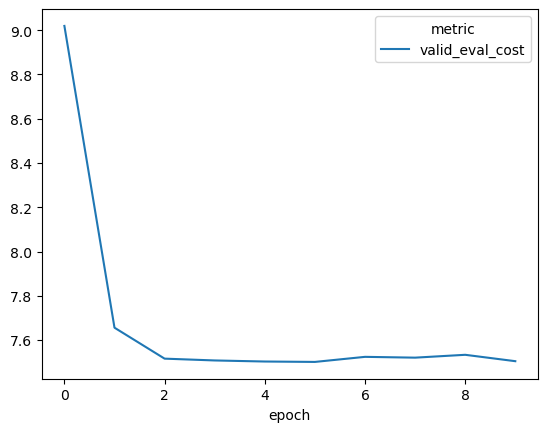

In [9]:
stats_df[["valid_eval_cost"]].plot()

<AxesSubplot:xlabel='epoch'>

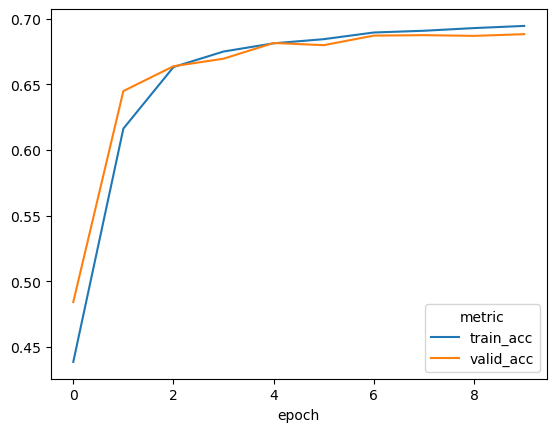

In [10]:
stats_df[["train_acc", "valid_acc"]].plot()

<AxesSubplot:xlabel='epoch'>

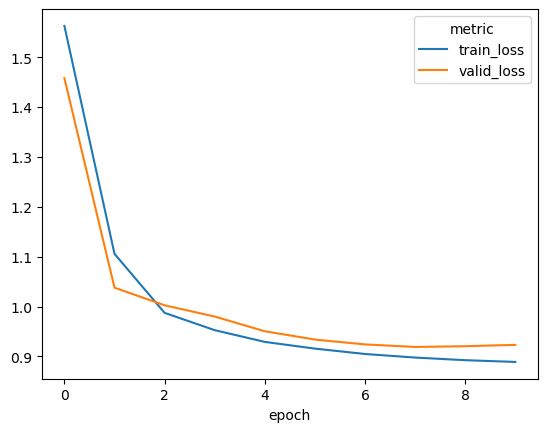

In [11]:
stats_df[["train_loss", "valid_loss"]].plot()

In [12]:
graphs = pd.read_pickle(graphs_path)

In [13]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [83]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[-100:]):
    # g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = beam_inference_single(model, g, beam_width=10)
    # res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:16<00:00,  4.36s/it]


saved


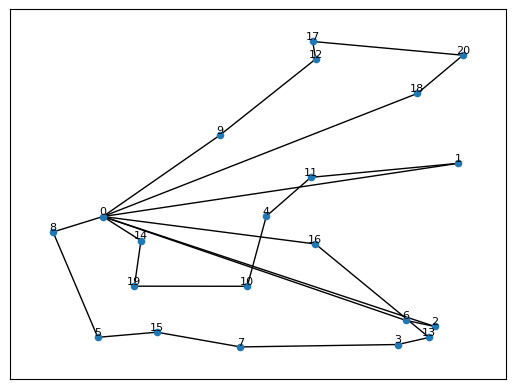

In [84]:
example_g = solved_graphs[5].get_all_graphs()[-1]
example_g.draw_graph()

In [85]:
import numpy as np

In [86]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

7.176768991325713

## Solving graphs

In [3]:
import torch
import pandas as pd
from copy import deepcopy
from tqdm import tqdm

from training_new import get_data_loaders, train
from model import Model, DummyModel
from inference import greedy_inference_single
from util import create_graph_no_sol

In [4]:
graphs_path = "./solver/sol_examples/vrp20/sols.pkl"

In [5]:
train_dl, valid_dl = get_data_loaders(graphs_path, batch_size=5, max_instances=20)

Parsing Graphs: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 105.26it/s]


In [12]:
model = Model(4, 20, 2, 0.0)
train(model, "./solver/sol_examples/vrp20/sols.pkl", epochs=5, batch_size=16, learning_rate=3e-3, max_instances=2000)

0.003


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 294.25it/s]


Train 0 - loss:1.1918, acc:0.5872
Valid 0 - loss:1.0585, acc:0.6409


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 284.91it/s]


Train 1 - loss:1.0033, acc:0.6596
Valid 1 - loss:1.0385, acc:0.6562


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:07<00:00, 305.36it/s]


Train 2 - loss:0.9835, acc:0.6676
Valid 2 - loss:1.0111, acc:0.6747


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:06<00:00, 315.54it/s]


Train 3 - loss:0.9719, acc:0.6673
Valid 3 - loss:0.9853, acc:0.6801


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2185/2185 [00:06<00:00, 316.94it/s]


Train 4 - loss:0.9607, acc:0.6708
Valid 4 - loss:1.0037, acc:0.6746


In [11]:
graphs = pd.read_pickle(graphs_path)

In [12]:
graph_collections = [create_graph_no_sol(g) for g, _ in graphs]

In [16]:
solved_graphs = []
for g, orig_g in tqdm(list(zip(graph_collections, graphs))[:100]):
    g = deepcopy(graph_collections[0])
    g = deepcopy(g)
    g.update_node(orig_g[1][1][0]) # unf we have to do this for now
    res_g = greedy_inference_single(model, g)
    solved_graphs.append(res_g)

[autoreload of inference failed: Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/anaconda3/envs/pyt1-osx-64/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/roberto/Desktop/stanford/cs224w/project/cs224w/inference.py", line 54


In [17]:
solved_graphs[0].get_full_solution_cost()

7.199907914085822

In [39]:
np.mean([sg.get_full_solution_cost() for sg in solved_graphs])

8.23473345975078